## Walking through feature/emissions in lcdmpc

In [2]:
%load_ext autoreload
%autoreload 2

import compute_emissions
import pandas as pd
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

/opt/anaconda3/envs/aumc1/lib/python3.9/site-packages/pyoptsparse/pyOpt_MPI.py:68: UserWarning: mpi4py could not be imported. mpi4py is required to use the parallel gradient analysis and parallel objective analysis for non-gradient based optimizers. Continuing using a dummy MPI module from pyOptSparse.
  warnings.warn(warn)


Outputs with and without emissions

Temperature: [-1.144000000000002]
Temperature: [-1.144000000000002]


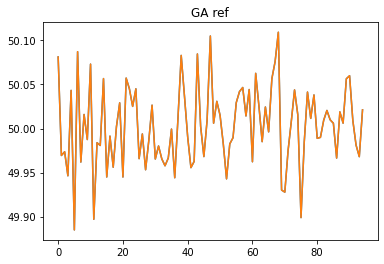

In [11]:
df_no_emissions = compute_emissions.compute_emissons(no_hr_sim=1, temperature_factor=  0, tracking_factor = .1)
df_emissions = compute_emissions.compute_emissons(no_hr_sim=1, emissions_factor = 0.5, temperature_factor=  10, tracking_factor =.1)

Visualization

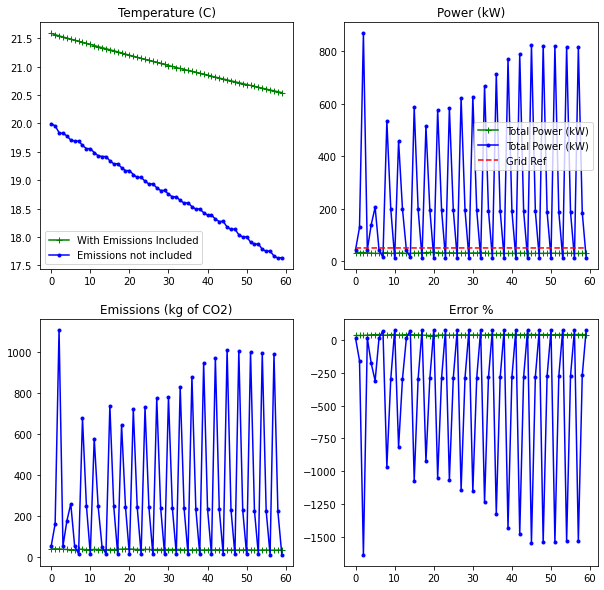

In [12]:
# Temperature
fig, ax = plt.subplots(2,2, figsize = (10, 10))
ax[0,0].plot(df_emissions["Temperature (C)"], 'g+-', label = "With Emissions Included")
ax[0,0].plot(df_no_emissions["Temperature (C)"], 'b.-', label = "Emissions not included")
ax[0,0].title.set_text("Temperature (C)")
ax[0,0].legend()

# Power
ax[0,1].plot(df_emissions["Total Power (kW)"], 'g+-', label = "Total Power (kW)")
ax[0,1].plot(df_no_emissions["Total Power (kW)"], 'b.-', label = "Total Power (kW)")
ax[0,1].plot(df_emissions["Grid Power Reference (kW)"], 'r--', label = "Grid Ref")
ax[0,1].title.set_text("Power (kW)")
ax[0,1].legend()

# Emissions
ax[1,0].plot(df_emissions["Emissions (kg of CO2)"], 'g+-')
ax[1,0].plot(df_no_emissions["Emissions (kg of CO2)"], 'b.-')
ax[1,0].title.set_text("Emissions (kg of CO2)")

# Error %
ax[1,1].plot(df_emissions["Error (%)"], 'g+-')
ax[1,1].plot(df_no_emissions["Error (%)"],'b.-')
ax[1,1].title.set_text("Error %")


Different values of Q

Temperature: [-1.144000000000002]
Temperature: [-1.144000000000002]
Temperature: [-1.144000000000002]
Temperature: [-1.144000000000002]
Temperature: [-1.144000000000002]
Temperature: [-1.144000000000002]
Temperature: [-1.144000000000002]
Temperature: [-1.144000000000002]
Temperature: [-1.144000000000002]
Temperature: [-1.144000000000002]


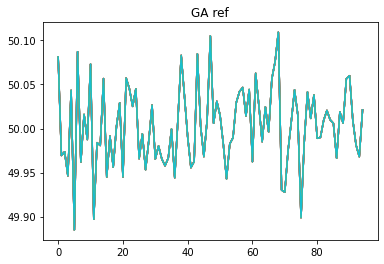

In [3]:
import numpy as np

emissions_list = []
error_list = []
temp_list = []
emissions_rate = []
q = np.logspace(-4, 0, num=10)
for q_val in q:
    
    df = compute_emissions.compute_emissons(no_hr_sim=1, emissions_factor= q_val, temperature_factor=10, tracking_factor= 0.1)

    emissions_list.append(df["Emissions (kg of CO2)"])
    error_list.append(df["Error (%)"])
    temp_list.append(df["Temperature (C)"])
    emissions_rate.append(df["Emissions Rate (kg of CO2/MWh)"])




Visualize data for different Q values. 

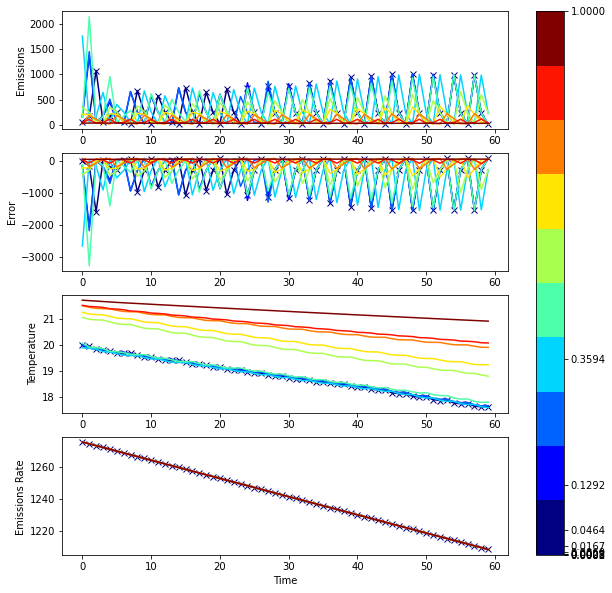

In [4]:
import numpy as np

jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,len(q))))
fig, ax = plt.subplots(4, 1 , figsize = (10, 10))
for i in range(len(q)):
    cur_color = next(colors)
    if i == 0:
        m = "x"
    else:
        m = ""
    ax[0].plot(emissions_list[i], color=cur_color, marker = m, label = f"Q = {q[i]}")
    ax[0].set_ylabel ("Emissions")
    ax[1].plot(error_list[i], color=cur_color,marker = m, label = f"Q = {q[i]}" )
    ax[1].set_ylabel ("Error")
    ax[2].plot(temp_list[i], color = cur_color ,marker = m, label = f"Q = {q[i]}")
    ax[2].set_ylabel ("Temperature")
    ax[3].plot(emissions_rate[i], color = cur_color,marker = m, label = f"Q = {q[i]}")
    ax[3].set_ylabel ("Emissions Rate ")
    ax[3].set_xlabel("Time")
# creating ScalarMappable

import matplotlib
norm = matplotlib.colors.Normalize(vmin=min(q), vmax=max(q))

cmap = plt.get_cmap('jet', len(q))

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax.ravel().tolist(), ticks=q)


This is for only temperature tracking. 

Temperature: [-1.144000000000002]


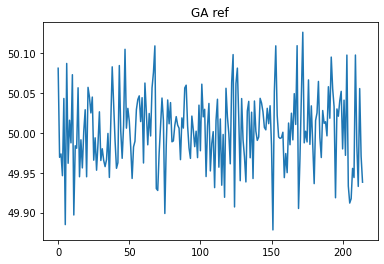

In [42]:
df = compute_emissions.compute_emissons(no_hr_sim=3, emissions_factor = 10, temperature_factor=10, tracking_factor= 0)

<AxesSubplot:xlabel='Emissions Rate (kg of CO2/MWh)', ylabel='Emissions (kg of CO2)'>

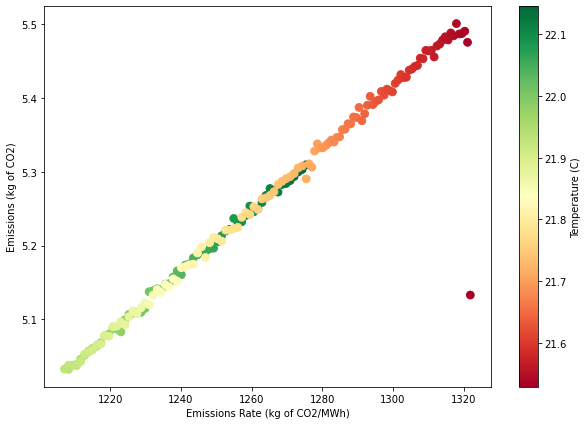

In [43]:
fig, ax = plt.subplots(figsize = (10,7) )

df.plot(kind='scatter', x='Emissions Rate (kg of CO2/MWh)', y='Emissions (kg of CO2)', s=60, c='Temperature (C)', cmap='RdYlGn', ax = ax) 
